# KNN with Iris

## Libraries

In [2]:
# For nearest neighbors. You need to use sklearn.neighbors because
# sklearn is so big
import sklearn.neighbors as nei
import pandas as pd
# for train test split
import sklearn.model_selection as mod

## Data

In [3]:
# Load the iris data set from a URL.
df = pd.read_csv("https://github.com/ianmcloughlin/datasets/raw/master/iris.csv")

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Visualise

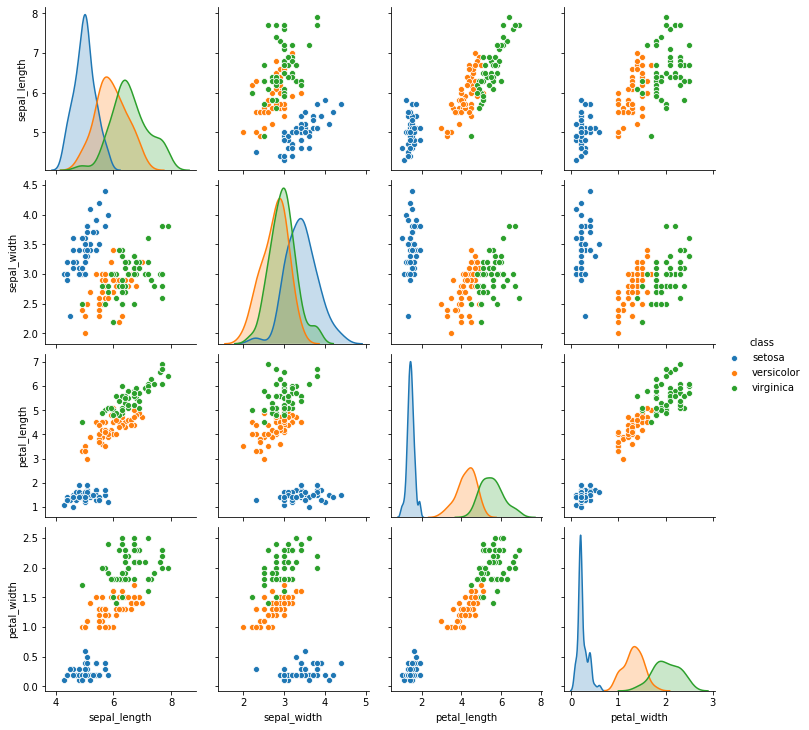

In [5]:
# Load the seaborn package.
import seaborn as sns

# Plot the Iris data set with a pair plot.
sns.pairplot(df, hue="class")

## Inputs and outputs

In [6]:
# You need to seperate inputs and outputs
inputs = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
outputs = df['class']

In [15]:
inputs

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Classifier

In [7]:
# Using the kNN function. It returns back an object (data structure)
# that represents the knn algorithm where k is et to 5.
# So it's going to select its 5 nearest neighbors. So it will
# take the 5 closest points and find the most common (or most likely)
knn = nei.KNeighborsClassifier(n_neighbors=5)

## Fit

In [8]:
# Train the algorithm. Build a model of what the categories look like.
# knn is now changed to fit our data.
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Predict

In [9]:
df.loc[121]

sepal_length          5.6
sepal_width           2.8
petal_length          4.9
petal_width             2
class           virginica
Name: 121, dtype: object

In [10]:
knn.predict([[5.6, 2.8, 4.9, 2.0]])

array(['virginica'], dtype=object)

In [17]:
knn.predict([[5, 3, 5, 1], [5.6, 2.8, 4.9, 2.0]])

array(['versicolor', 'virginica'], dtype=object)

## Evaluate

In [18]:
knn.predict(inputs)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
     

In [19]:
knn.predict(inputs) == outputs

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: class, Length: 150, dtype: bool

In [11]:
# knn.predict takes input and predicts output.
# Take the inputs and check if they match what category they are
# in our dataset. and sum the true outpts (1s)
(knn.predict(inputs) == outputs).sum()

145

In [21]:
mod.train_test_split(inputs, outputs, test_size=0.33)

[     sepal_length  sepal_width  petal_length  petal_width
 50            7.0          3.2           4.7          1.4
 26            5.0          3.4           1.6          0.4
 65            6.7          3.1           4.4          1.4
 70            5.9          3.2           4.8          1.8
 76            6.8          2.8           4.8          1.4
 ..            ...          ...           ...          ...
 134           6.1          2.6           5.6          1.4
 58            6.6          2.9           4.6          1.3
 143           6.8          3.2           5.9          2.3
 97            6.2          2.9           4.3          1.3
 146           6.3          2.5           5.0          1.9
 
 [100 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 138           6.0          3.0           4.8          1.8
 68            6.2          2.2           4.5          1.5
 94            5.6          2.7           4.2          1.3
 108           6.7          2

In [20]:
# Rather then fitting the knn with all the dataset why not use a certain amount
# mod.train_test_split has 3 inputs the input attributes, 
# the output attributes and the percentage of the samples to be used.
# Takes dataframe and splits it into two parts 50 inputs_test and outputs_test
# and 100 inputs_train and outputs_train
# Basically train with 67% and test with 33% of dataframe.
# Gives a random selection
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [22]:
inputs_train

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
119,6.0,2.2,5.0,1.5
1,4.9,3.0,1.4,0.2
110,6.5,3.2,5.1,2.0
41,4.5,2.3,1.3,0.3
...,...,...,...,...
42,4.4,3.2,1.3,0.2
6,4.6,3.4,1.4,0.3
66,5.6,3.0,4.5,1.5
115,6.4,3.2,5.3,2.3


In [13]:
# Re-create the classifier using the 100 randomly selected
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
# See how many of the 50 test data is accurate.
(knn.predict(inputs_test) == outputs_test).sum()

48

## End